In [73]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_excel('China.xlsx')

In [15]:
df.keys()[4:35]

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='object')

In [16]:
df = df.dropna(thresh=3, subset=df.keys()[4:35])
df.count()
m=df[df.keys()[4:35]].mean(axis=1)
df=df.fillna({x:m for x in df.keys()[4:35]})

In [18]:
df.to_csv('filled_China.csv')

In [27]:
df = pd.read_csv('filled_China.csv')

In [34]:
newdf = df.T
newdf.to_csv('New_China.csv')

In [80]:
newdf = pd.read_csv('New_China.csv')
newdf.corr('spearman')

,Indicator Name,Unemployment rate,Inflation,Urban population,"School enrollment, tertiary",Refugee population,Poverty headcount ratio,Poverty gap at $6.85 a day,Out-of-pocket expenditure per capita,Nitrous oxide emissions,...,Literacy rate,Life expectancy,Intentional homicides,Increase in poverty gap,Lower 20% income,Highest 20% income,Gross capital formation,GDP per capita,Health expenditure per capita,Energy use per capita
Indicator Name,1.000000,0.807584,-0.279032,1.000000,0.996371,0.947177,-0.779559,-0.739365,0.441351,0.946774,...,0.486931,1.000000,-0.640165,-0.074912,-0.153264,0.155100,0.998790,1.000000,0.441351,0.798184
Unemployment rate,0.807584,1.000000,-0.307382,0.807584,0.819080,0.780758,-0.514696,-0.435121,0.141537,0.755143,...,0.262457,0.807584,-0.491871,-0.073841,-0.360125,0.264814,0.809802,0.807584,0.141537,0.840202
Inflation,-0.279032,-0.307382,1.000000,-0.279032,-0.291129,-0.224194,0.046964,0.106198,0.166228,-0.253629,...,0.071450,-0.279032,0.129518,-0.416425,0.007197,-0.032163,-0.277823,-0.279032,0.166228,-0.176025
Urban population,1.000000,0.807584,-0.279032,1.000000,0.996371,0.947177,-0.779559,-0.739365,0.441351,0.946774,...,0.486931,1.000000,-0.640165,-0.074912,-0.153264,0.155100,0.998790,1.000000,0.441351,0.798184
"School enrollment, tertiary",0.996371,0.819080,-0.291129,0.996371,1.000000,0.939516,-0.773425,-0.732807,0.441351,0.943145,...,0.459547,0.996371,-0.640165,-0.074912,-0.145855,0.147694,0.995161,0.996371,0.441351,0.797375
Refugee population,0.947177,0.780758,-0.224194,0.947177,0.939516,1.000000,-0.818273,-0.773425,0.483836,0.962903,...,0.413592,0.947177,-0.719773,-0.085299,-0.146066,0.111088,0.946371,0.947177,0.483836,0.804659
Poverty headcount ratio,-0.779559,-0.514696,0.046964,-0.779559,-0.773425,-0.818273,1.000000,0.953385,-0.624539,-0.835620,...,-0.327959,-0.779559,0.724085,0.167943,0.160373,-0.152087,-0.778290,-0.779559,-0.624539,-0.579260
Poverty gap at $6.85 a day,-0.739365,-0.435121,0.106198,-0.739365,-0.732807,-0.773425,0.953385,1.000000,-0.637523,-0.784848,...,-0.329280,-0.739365,0.666954,0.176860,0.076411,-0.068162,-0.738096,-0.739365,-0.637523,-0.503893
Out-of-pocket expenditure per capita,0.441351,0.141537,0.166228,0.441351,0.441351,0.483836,-0.624539,-0.637523,1.000000,0.455375,...,0.218302,0.441351,-0.590295,-0.282698,0.334566,-0.332036,0.440113,0.441351,1.000000,0.150674
Nitrous oxide emissions,0.946774,0.755143,-0.253629,0.946774,0.943145,0.962903,-0.835620,-0.784848,0.455375,1.000000,...,0.358195,0.946774,-0.680587,-0.112683,-0.175915,0.181338,0.945161,0.946774,0.455375,0.834805


In [81]:
import matplotlib.pyplot as plt 
# 绘制散点图矩阵
# pd.plotting.scatter_matrix(newdf)
# plt.show()

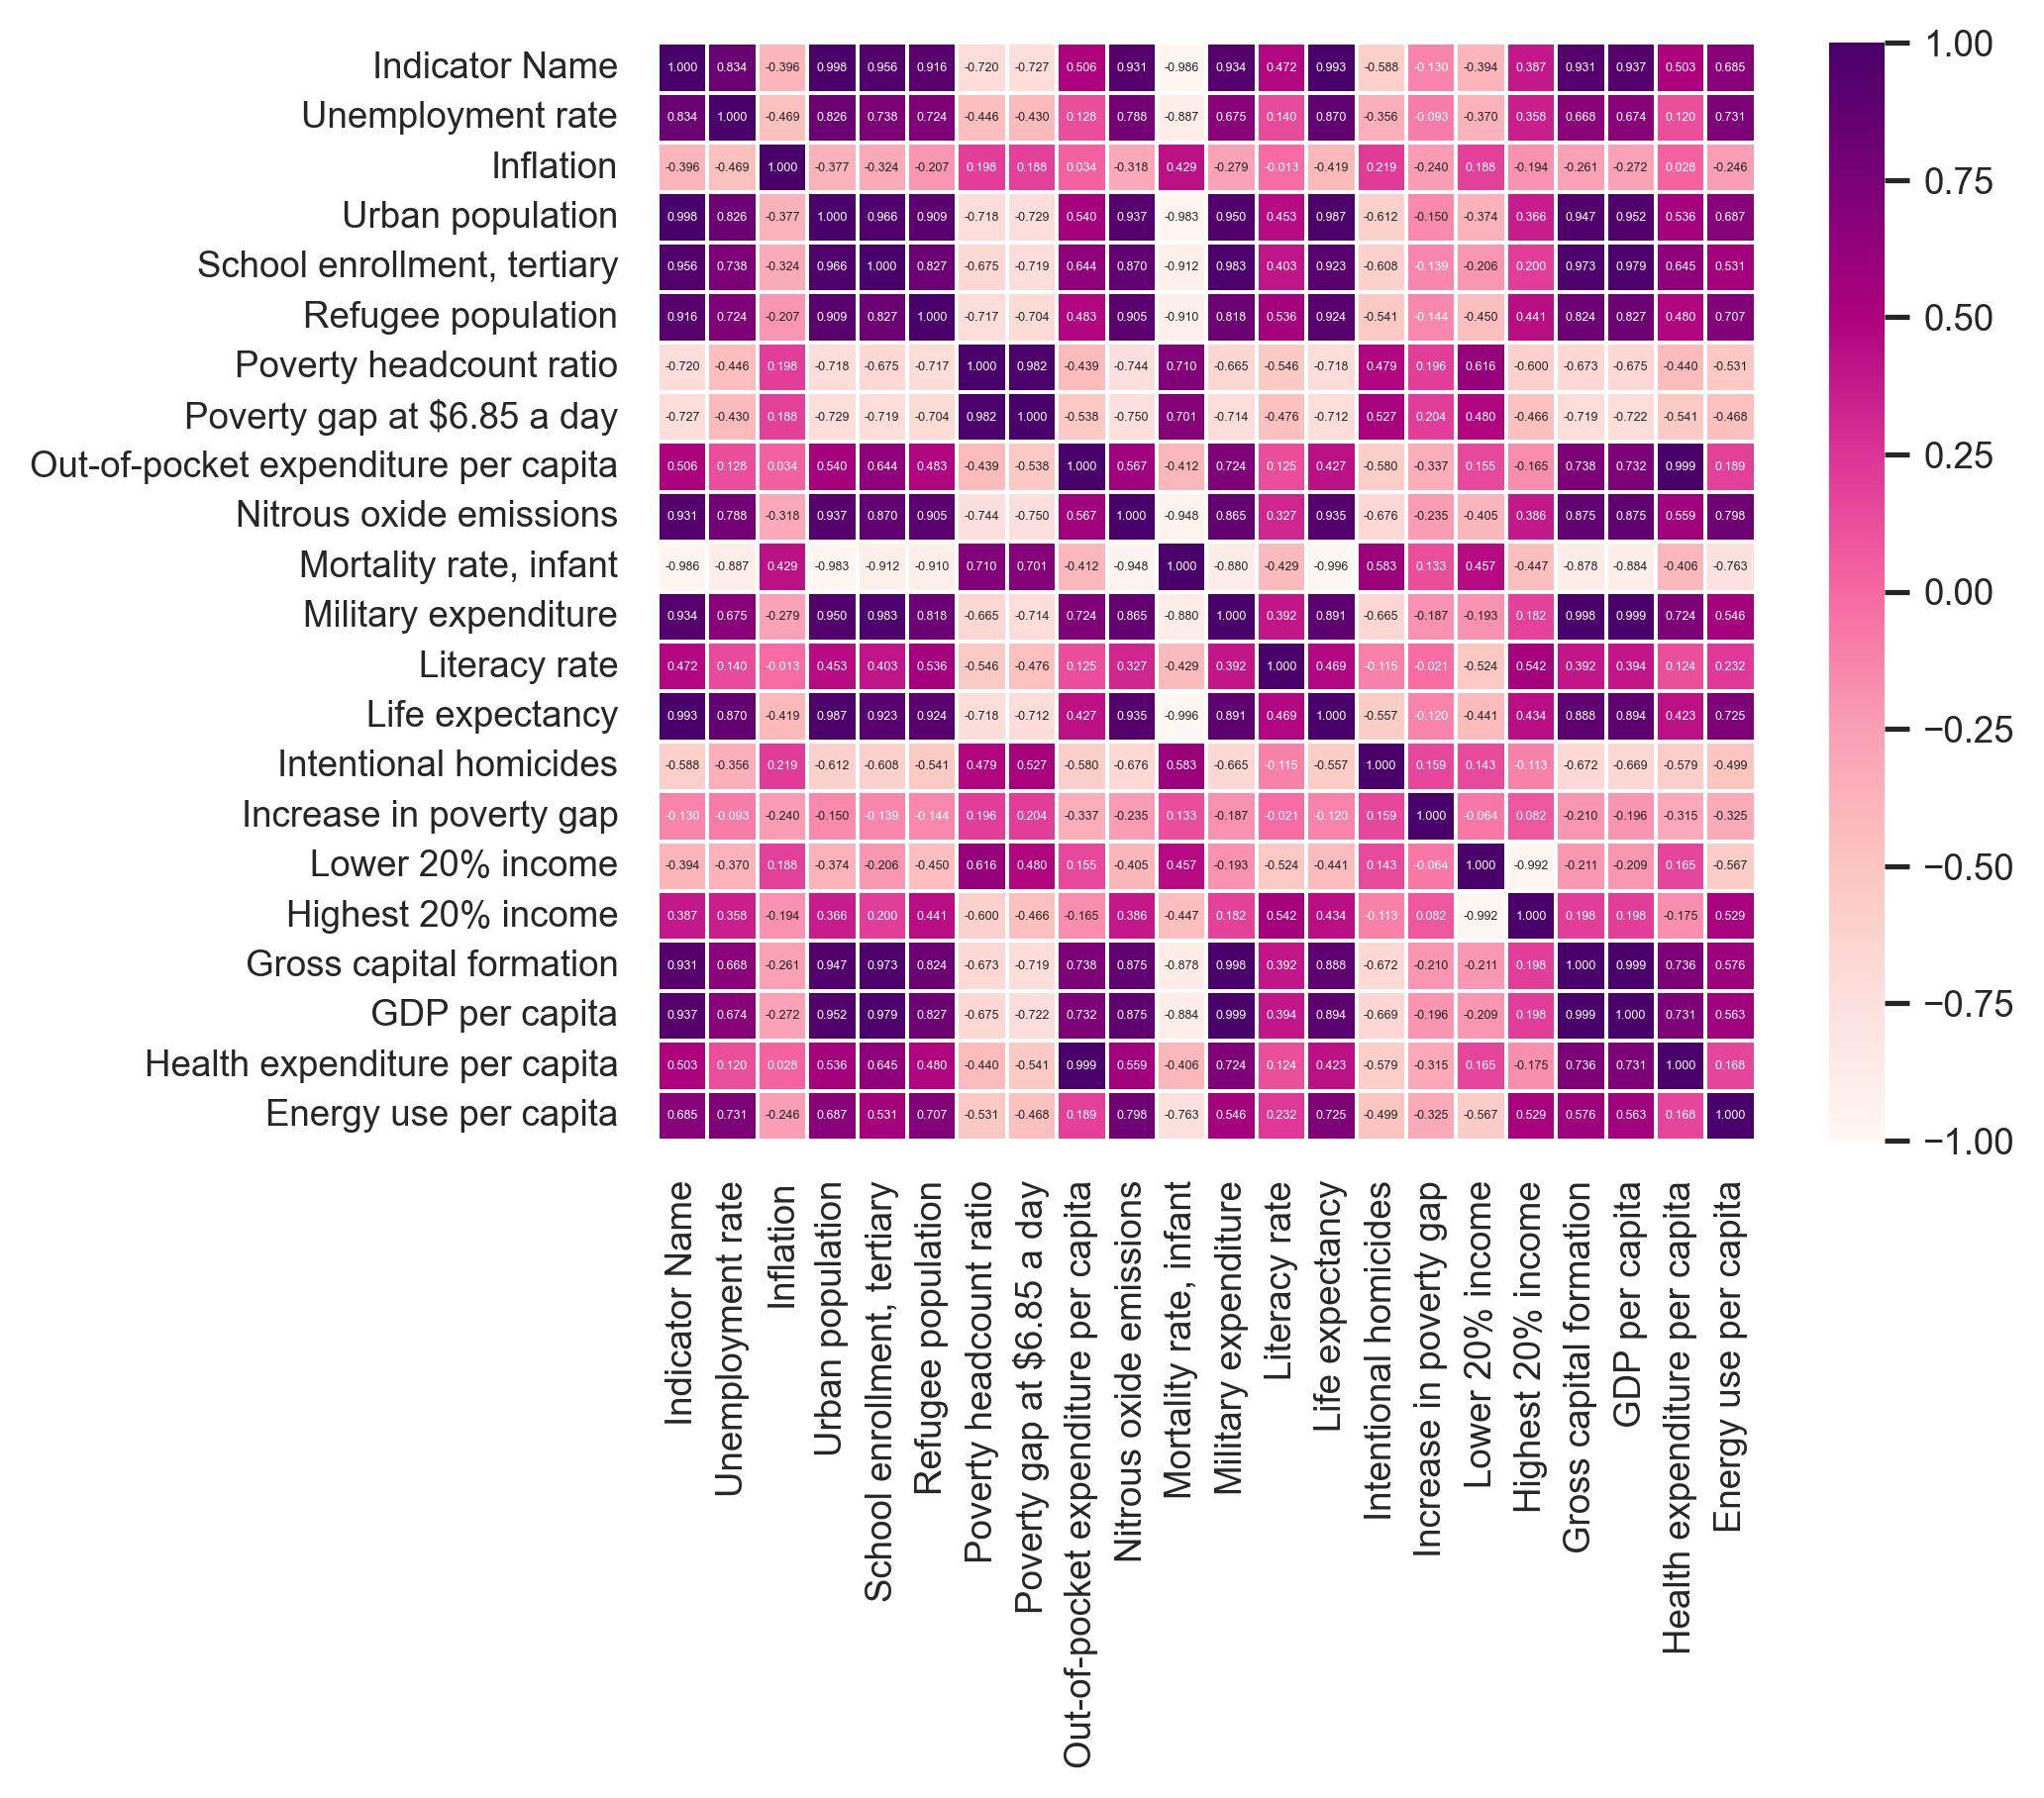

In [82]:
corr = newdf.corr('pearson')
import seaborn as sns

plt.figure(dpi=300)
sns.set(font_scale=0.8)
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt=".3f",
                 vmin=-1,             #刻度阈值
                 vmax=1,
                 linewidths=.5,
                 cmap="RdPu",        #刻度颜色
                 annot_kws={"size":3},
                 xticklabels=True,
                 yticklabels=True) 
plt.savefig('a.png', dpi=500)
# sns.heatmap(corr, annot=True)

In [83]:
import scipy.stats as sta
# 夏皮洛‐威尔克检验
for key in newdf.keys():
    print(key, sta.shapiro(newdf[key]))

Indicator Name ShapiroResult(statistic=0.9572795629501343, pvalue=0.24680747091770172)
Unemployment rate ShapiroResult(statistic=0.8368754982948303, pvalue=0.0002694832510314882)
Inflation ShapiroResult(statistic=0.71836256980896, pvalue=2.1941186787444167e-06)
Urban population ShapiroResult(statistic=0.9424920678138733, pvalue=0.09672515094280243)
School enrollment, tertiary ShapiroResult(statistic=0.8757542371749878, pvalue=0.0018866406753659248)
Refugee population ShapiroResult(statistic=0.8951500058174133, pvalue=0.005466236267238855)
Poverty headcount ratio ShapiroResult(statistic=0.8140295147895813, pvalue=9.491528908256441e-05)
Poverty gap at $6.85 a day ShapiroResult(statistic=0.8751696944236755, pvalue=0.001828978769481182)
Out-of-pocket expenditure per capita ShapiroResult(statistic=0.9281425476074219, pvalue=0.03903600946068764)
Nitrous oxide emissions ShapiroResult(statistic=0.8766319751739502, pvalue=0.001976868137717247)
Mortality rate, infant ShapiroResult(statistic=0.89